# Salary survey: Data analysis for salary among managers in the world. 

This will be a project based on the CRISP model, this means here will be developed six steps for the analysis:

1.- Business understanding.

2.- Data understanding.

3.- Preparation.

4.- Modeling.

5.- Evaluation.

6.- Deploy.

Maybe here can be used NLP for open questions. 

Will be developed a story about a fictional organization using this data. 


Data recovered from here: https://www.askamanager.org/2021/04/how-much-money-do-you-make-4.html

This data is related with salary in many professional fields around the globe. Here are records from managers, systems engineers, librarians, and so on. The example of the questions is the next:

- How old are you?
- What industry do you work in?
- Job title
- If your job title needs additional context, please clarify here:
- What is your annual salary? (You'll indicate the currency in a later question. If you are part-time or hourly, please enter an annualized equivalent -- what you would earn if you worked the job 40 hours a week, 52 weeks a year.)
- How much additional monetary compensation do you get, if any (for example, bonuses or overtime in an average year)? Please only include monetary compensation here, not the value of benefits.
- Please indicate the currency
- If "Other," please indicate the currency here:
- If your income needs additional context, please provide it here:
- What country do you work in?
- If you're in the U.S., what state do you work in?
- What city do you work in?
- How many years of professional work experience do you have overall?
- How many years of professional work experience do you have in your field?
- What is your highest level of education completed?
- What is your gender?
- What is your race? (Choose all that apply.)


with this can be started the search and Exploratory Data Analysis

In [1]:
# Imports cell
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from dython.nominal import associations
from pathlib import Path  

In [2]:
salary_survey_data:pd.DataFrame = pd.read_csv('./data/Ask A Manager Salary Survey 2021 (Responses) - Form Responses 1 (1).csv', sep=',')

column_names = salary_survey_data.columns


In [3]:
salary_survey_data.head()

,Timestamp,How old are you?,What industry do you work in?,Job title,"If your job title needs additional context, please clarify here:","What is your annual salary? (You'll indicate the currency in a later question. If you are part-time or hourly, please enter an annualized equivalent -- what you would earn if you worked the job 40 hours a week, 52 weeks a year.)","How much additional monetary compensation do you get, if any (for example, bonuses or overtime in an average year)? Please only include monetary compensation here, not the value of benefits.",Please indicate the currency,"If ""Other,"" please indicate the currency here:","If your income needs additional context, please provide it here:",What country do you work in?,"If you're in the U.S., what state do you work in?",What city do you work in?,How many years of professional work experience do you have overall?,How many years of professional work experience do you have in your field?,What is your highest level of education completed?,What is your gender?,What is your race? (Choose all that apply.)
0,4/27/2021 11:02:10,25-34,Education (Higher Education),Research and Instruction Librarian,NaN,"55,000",0.0,USD,NaN,NaN,United States,Massachusetts,Boston,5-7 years,5-7 years,Master's degree,Woman,White
1,4/27/2021 11:02:22,25-34,Computing or Tech,Change & Internal Communications Manager,NaN,"54,600",4000.0,GBP,NaN,NaN,United Kingdom,NaN,Cambridge,8 - 10 years,5-7 years,College degree,Non-binary,White
2,4/27/2021 11:02:38,25-34,"Accounting, Banking & Finance",Marketing Specialist,NaN,"34,000",NaN,USD,NaN,NaN,US,Tennessee,Chattanooga,2 - 4 years,2 - 4 years,College degree,Woman,White
3,4/27/2021 11:02:41,25-34,Nonprofits,Program Manager,NaN,"62,000",3000.0,USD,NaN,NaN,USA,Wisconsin,Milwaukee,8 - 10 years,5-7 years,College degree,Woman,White
4,4/27/2021 11:02:42,25-34,"Accounting, Banking & Finance",Accounting Manager,NaN,"60,000",7000.0,USD,NaN,NaN,US,South Carolina,Greenville,8 - 10 years,5-7 years,College degree,Woman,White


In [4]:
salary_survey_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27922 entries, 0 to 27921
Data columns (total 18 columns):
 #   Column                                                                                                                                                                                                                                Non-Null Count  Dtype  
---  ------                                                                                                                                                                                                                                --------------  -----  
 0   Timestamp                                                                                                                                                                                                                             27922 non-null  object 
 1   How old are you?                                                                                             

In [5]:
salary_survey_data.shape

(27922, 18)

This dataset have a shape of 27922 rows and 18 columns. 
Six categorical variables: 
- Industry, 
- US state, 
- Education level, 
- Gender
- Currency  
- Race

Race is treated as string, with values separated by commas, because is a multiple choide question variable. Hence, this last variable requires special treatment, like dummy variables. 

Three rank variables:
- Age
- Total years of work
- Field years of work

Six character variables:
- Job title
- Job context
- Other currency
- Income text
- Country
- City

Two numerical variables
- Annual salary
- Additional compensation


We have one last variable: Timestamp. Date and moment when the observation was recorder.

Numerical variables have a trouble: are actually strings, it's necessary to replace them by numbers based on strings.

After that, is necessary to set together categorical variables and numerical variables. The free text variables will be removed from this initial part of analysis, and missing values (NaN) will be replaced by -99.

In [6]:

categorical_variables = [
  column_names[1],
  column_names[2],
  column_names[3],
  column_names[7],
  column_names[10],
  column_names[11],
  column_names[12],
  column_names[13],
  column_names[14],
  column_names[15],
  column_names[16],
  ]

continuous_variables = [
  column_names[5],
  column_names[6],
]

# This for is used to convert string types to int types in salary column.
for i in range(len(salary_survey_data[column_names[5]])):
  if isinstance(salary_survey_data[column_names[5]][i], str):
    salary_survey_data[column_names[5]][i] = float(salary_survey_data[column_names[5]][i].replace(",", ""))

for i in range(len(salary_survey_data[column_names[6]])):
  if isinstance(salary_survey_data[column_names[6]][i], str):
    salary_survey_data[column_names[6]][i] = float(salary_survey_data[column_names[5]][i].replace(",", ""))

# This is used to replace NaN for 0's

salary_survey_data[column_names[5]] = salary_survey_data[column_names[5]].replace(np.nan, 0)
salary_survey_data[column_names[6]] = salary_survey_data[column_names[6]].replace(np.nan, 0)

# This function is used to replace missing values in cat variables with a -99 
# To indentify null values. 
for cat_var in categorical_variables:
  salary_survey_data[cat_var] = salary_survey_data[cat_var].replace(np.nan, '-99')


/tmp/ipykernel_10235/3687890412.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  salary_survey_data[column_names[5]][i] = float(salary_survey_data[column_names[5]][i].replace(",", ""))


In [16]:
for i in range(len(categorical_variables)):
  print(f'column number {i} is {categorical_variables[i]}')

column number 0 is How old are you?
column number 1 is What industry do you work in?
column number 2 is Job title
column number 3 is Please indicate the currency
column number 4 is What country do you work in?
column number 5 is If you're in the U.S., what state do you work in?
column number 6 is What city do you work in?
column number 7 is How many years of professional work experience do you have overall?
column number 8 is How many years of professional work experience do you have in your field?
column number 9 is What is your highest level of education completed?
column number 10 is What is your gender?


Now, there are no NaN values. They where replaced by float numbers. Now is necessary to create a correlation matrix and get frequencies tables from the categorical variables to get majorities, and get basic descriptive values from numeric variables, the salary and the compensations. Will be created a new DataFrame with categorical variables and numerical variables, deleting the free answer variables.

In [8]:
salary_survey_data.head()

,Timestamp,How old are you?,What industry do you work in?,Job title,"If your job title needs additional context, please clarify here:","What is your annual salary? (You'll indicate the currency in a later question. If you are part-time or hourly, please enter an annualized equivalent -- what you would earn if you worked the job 40 hours a week, 52 weeks a year.)","How much additional monetary compensation do you get, if any (for example, bonuses or overtime in an average year)? Please only include monetary compensation here, not the value of benefits.",Please indicate the currency,"If ""Other,"" please indicate the currency here:","If your income needs additional context, please provide it here:",What country do you work in?,"If you're in the U.S., what state do you work in?",What city do you work in?,How many years of professional work experience do you have overall?,How many years of professional work experience do you have in your field?,What is your highest level of education completed?,What is your gender?,What is your race? (Choose all that apply.)
0,4/27/2021 11:02:10,25-34,Education (Higher Education),Research and Instruction Librarian,NaN,55000.0,0.0,USD,NaN,NaN,United States,Massachusetts,Boston,5-7 years,5-7 years,Master's degree,Woman,White
1,4/27/2021 11:02:22,25-34,Computing or Tech,Change & Internal Communications Manager,NaN,54600.0,4000.0,GBP,NaN,NaN,United Kingdom,-99,Cambridge,8 - 10 years,5-7 years,College degree,Non-binary,White
2,4/27/2021 11:02:38,25-34,"Accounting, Banking & Finance",Marketing Specialist,NaN,34000.0,0.0,USD,NaN,NaN,US,Tennessee,Chattanooga,2 - 4 years,2 - 4 years,College degree,Woman,White
3,4/27/2021 11:02:41,25-34,Nonprofits,Program Manager,NaN,62000.0,3000.0,USD,NaN,NaN,USA,Wisconsin,Milwaukee,8 - 10 years,5-7 years,College degree,Woman,White
4,4/27/2021 11:02:42,25-34,"Accounting, Banking & Finance",Accounting Manager,NaN,60000.0,7000.0,USD,NaN,NaN,US,South Carolina,Greenville,8 - 10 years,5-7 years,College degree,Woman,White


In [9]:
salary_survey_features_names = [*categorical_variables, *continuous_variables]

salary_survey_features = salary_survey_data.loc[:, salary_survey_features_names].copy()

salary_survey_features.rename(columns ={
  salary_survey_features_names[0] : 'age',
  salary_survey_features_names[1] : 'industry',
  salary_survey_features_names[2] : 'job title',
  salary_survey_features_names[3] : 'currency',
  salary_survey_features_names[4] : 'country',
  salary_survey_features_names[5] : 'us state',
  salary_survey_features_names[6] : 'city',
  salary_survey_features_names[7] : 'total years of work',
  salary_survey_features_names[8] : 'current field years of work',
  salary_survey_features_names[9] : 'education level',
  salary_survey_features_names[10] : 'gender',
  salary_survey_features_names[11] : 'annual salary',
  salary_survey_features_names[12] : 'monetary compensation',
}, inplace=True)

salary_survey_features.head()

,age,industry,job title,currency,country,us state,city,total years of work,current field years of work,education level,gender,annual salary,monetary compensation
0,25-34,Education (Higher Education),Research and Instruction Librarian,USD,United States,Massachusetts,Boston,5-7 years,5-7 years,Master's degree,Woman,55000.0,0.0
1,25-34,Computing or Tech,Change & Internal Communications Manager,GBP,United Kingdom,-99,Cambridge,8 - 10 years,5-7 years,College degree,Non-binary,54600.0,4000.0
2,25-34,"Accounting, Banking & Finance",Marketing Specialist,USD,US,Tennessee,Chattanooga,2 - 4 years,2 - 4 years,College degree,Woman,34000.0,0.0
3,25-34,Nonprofits,Program Manager,USD,USA,Wisconsin,Milwaukee,8 - 10 years,5-7 years,College degree,Woman,62000.0,3000.0
4,25-34,"Accounting, Banking & Finance",Accounting Manager,USD,US,South Carolina,Greenville,8 - 10 years,5-7 years,College degree,Woman,60000.0,7000.0


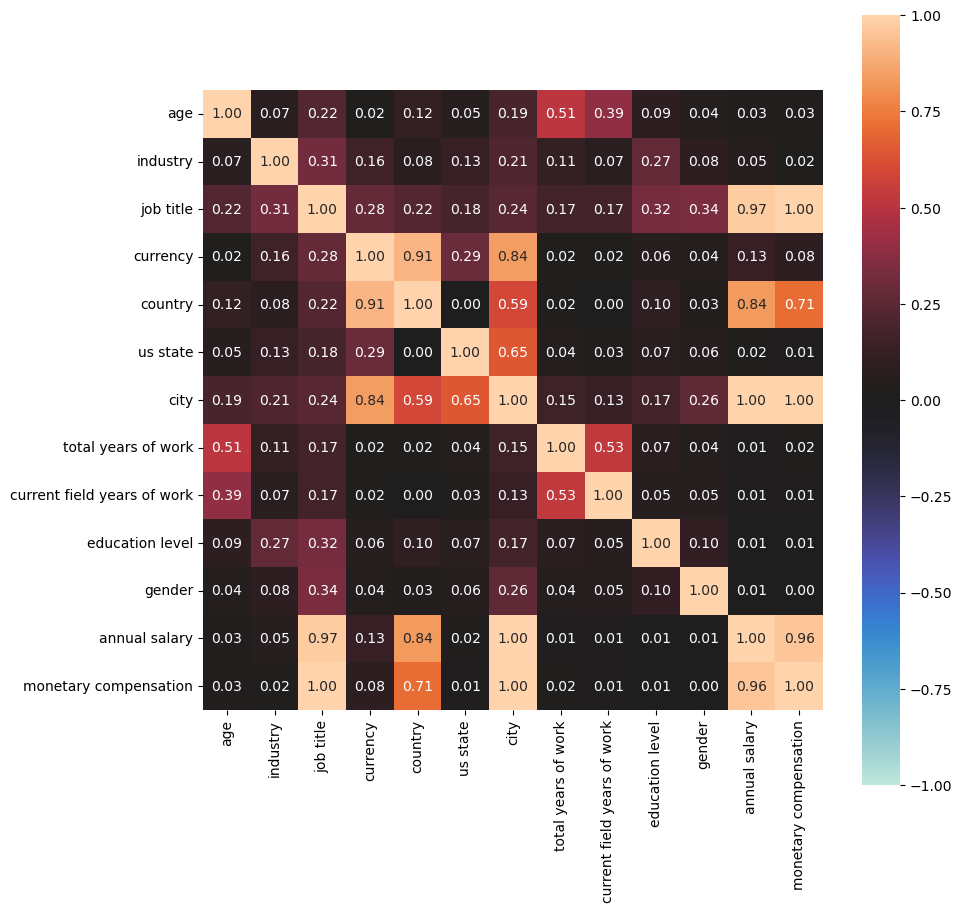

In [10]:
salary_survey_correlations = associations(
  dataset = salary_survey_features,
  nominal_columns = [
      'age',
      'industry',
      'job title',
      'currency',
      'country',
      'us state',
      'city',
      'total years of work',
      'current field years of work',
      'education level',
      'gender',
  ],
  figsize=(10,10)
)

In [11]:
categorical_variables_description = {}

for i in range(len(categorical_variables)):
  categorical_variables_description[f'column {i}'] = {
    'column name': categorical_variables[i],
    'column unique values': salary_survey_data[categorical_variables[i]].unique(),
    'column unique values amount': len(salary_survey_data[categorical_variables[i]].unique()),
  }
cat_vars_description_df = pd.DataFrame.from_dict(categorical_variables_description, orient='index')

In [12]:
cat_vars_description_df.sort_values(by=['column unique values amount'])

,column name,column unique values,column unique values amount
column 10,What is your gender?,"[Woman, Non-binary, Man, -99, Other or prefer ...",6
column 0,How old are you?,"[25-34, 45-54, 35-44, 18-24, 65 or over, 55-64...",7
column 9,What is your highest level of education comple...,"[Master's degree, College degree, PhD, -99, So...",7
column 7,How many years of professional work experience...,"[5-7 years, 8 - 10 years, 2 - 4 years, 21 - 30...",8
column 8,How many years of professional work experience...,"[5-7 years, 2 - 4 years, 21 - 30 years, 11 - 2...",8
column 3,Please indicate the currency,"[USD, GBP, CAD, EUR, AUD/NZD, Other, CHF, ZAR,...",11
column 5,"If you're in the U.S., what state do you work in?","[Massachusetts, -99, Tennessee, Wisconsin, Sou...",132
column 4,What country do you work in?,"[United States, United Kingdom, US, USA, Canad...",368
column 1,What industry do you work in?,"[Education (Higher Education), Computing or Te...",1210
column 6,What city do you work in?,"[Boston, Cambridge, Chattanooga, Milwaukee, Gr...",4793


At this point, there are the unique values for each categorical value. After currency, the values are too big to be counted in a frequency table. Later in this analysis dimentions will be reduced, by now, the frequencies for the rest variables are:

In [19]:
salary_survey_data[categorical_variables[10]].value_counts()

Woman                            21304
Man                               5419
Non-binary                         742
Other or prefer not to answer      291
-99                                165
Prefer not to answer                 1
Name: What is your gender?, dtype: int64

In [20]:
salary_survey_data[categorical_variables[0]].value_counts()

25-34         12599
35-44          9869
45-54          3174
18-24          1186
55-64           991
65 or over       92
under 18         11
Name: How old are you?, dtype: int64

In [21]:
salary_survey_data[categorical_variables[9]].value_counts()

College degree                        13454
Master's degree                        8830
Some college                           2048
PhD                                    1424
Professional degree (MD, JD, etc.)     1321
High School                             634
-99                                     211
Name: What is your highest level of education completed?, dtype: int64

In [22]:
salary_survey_data[categorical_variables[7]].value_counts()

11 - 20 years       9593
8 - 10 years        5364
5-7 years           4856
21 - 30 years       3624
2 - 4 years         2992
31 - 40 years        866
1 year or less       507
41 years or more     120
Name: How many years of professional work experience do you have overall?, dtype: int64

In [23]:
salary_survey_data[categorical_variables[8]].value_counts()

11 - 20 years       6522
5-7 years           6496
2 - 4 years         6210
8 - 10 years        4958
21 - 30 years       1866
1 year or less      1452
31 - 40 years        380
41 years or more      38
Name: How many years of professional work experience do you have in your field?, dtype: int64

In [24]:
salary_survey_data[categorical_variables[3]].value_counts()

USD        23267
CAD         1663
GBP         1585
EUR          637
AUD/NZD      500
Other        155
CHF           37
SEK           37
JPY           23
ZAR           14
HKD            4
Name: Please indicate the currency, dtype: int64

[Text(0, 0, 'Woman'), Text(1, 0, 'Non-binary'), Text(2, 0, 'Man'), Text(3, 0, '-99'), Text(4, 0, 'Other or prefer not to answer'), Text(5, 0, 'Prefer not to answer')]


<AxesSubplot:xlabel='What is your gender?', ylabel='count'>

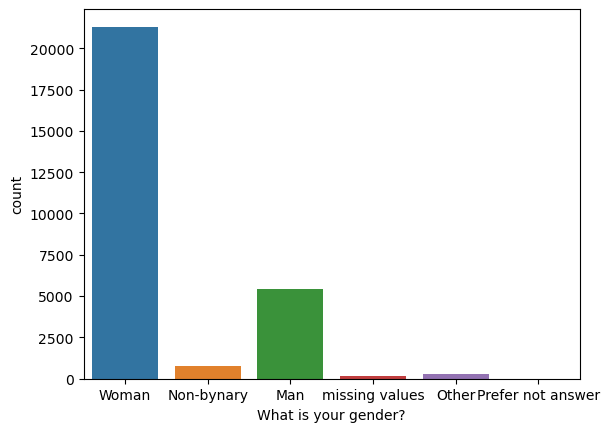

In [28]:
gender_plot = sns.countplot(data=salary_survey_data, x = categorical_variables[10])
# print(gender_plot.get_xticklabels())
gender_plot.set_xticklabels(
  [
    'Woman', 
    'Non-bynary', 
    'Man', 
    'missing values', 
    'Other',
    'Prefer not answer'
  ]
)
gender_plot


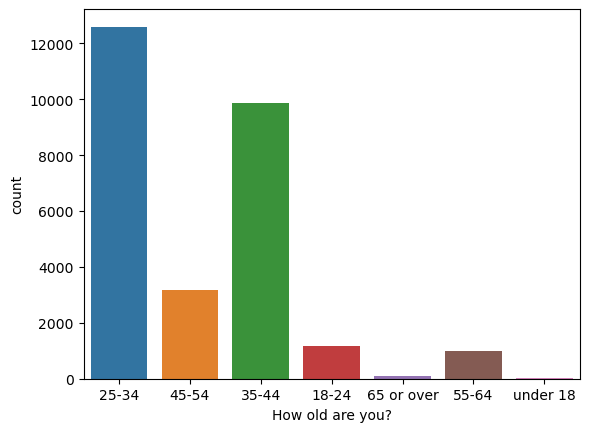

In [30]:
age_plot = sns.countplot(data=salary_survey_data, x = categorical_variables[0])


<AxesSubplot:xlabel='What is your highest level of education completed?', ylabel='count'>

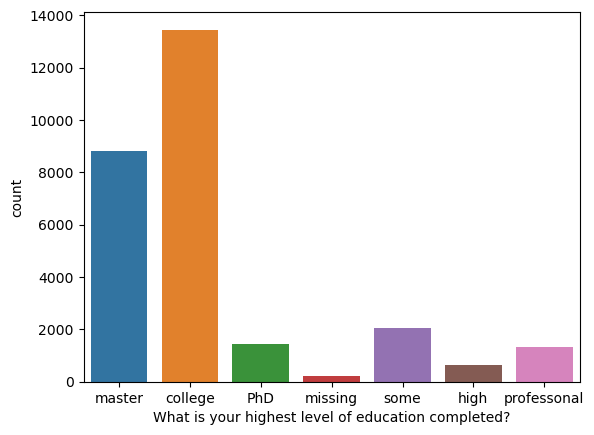

In [25]:
education_plot = sns.countplot(data=salary_survey_data, x = categorical_variables[9])
# print(education_plot.get_xticklabels())
education_plot.set_xticklabels(['master', 'college', 'PhD', 'missing', 'some', 'high', 'professonal'])
education_plot

<AxesSubplot:xlabel='How many years of professional work experience do you have overall?', ylabel='count'>

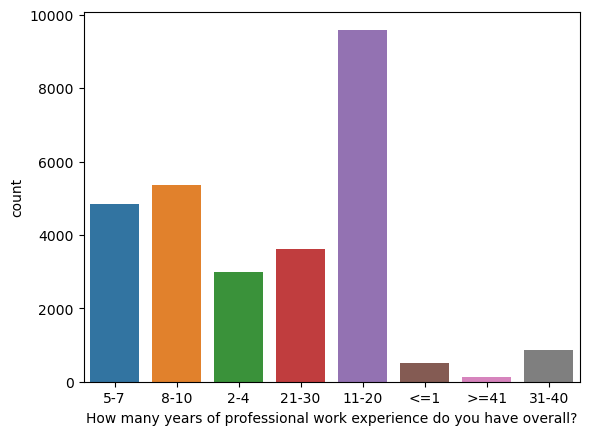

In [36]:
total_years_of_work = sns.countplot(data=salary_survey_data, x = categorical_variables[7])
# total_years_of_work.get_xticklabels()
total_years_of_work.set_xticklabels(
  [
    '5-7',
    '8-10',
    '2-4',
    '21-30',
    '11-20',
    '<=1',
    '>=41',
    '31-40'
  ]
)
total_years_of_work

<AxesSubplot:xlabel='How many years of professional work experience do you have in your field?', ylabel='count'>

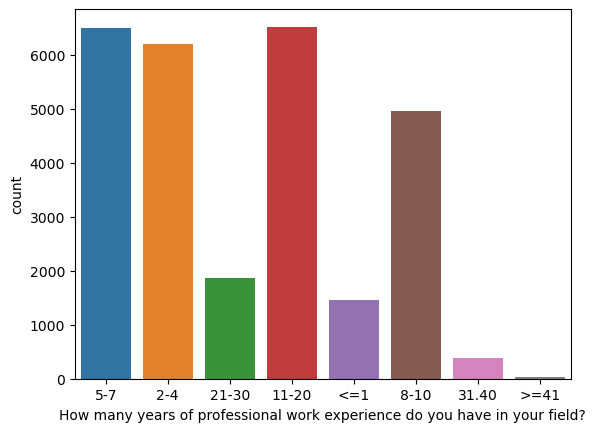

In [38]:
field_years_of_work = sns.countplot(data=salary_survey_data, x = categorical_variables[8])
field_years_of_work.get_xticklabels()
field_years_of_work.set_xticklabels(
  [
    '5-7',
    '2-4',
    '21-30',
    '11-20',
    '<=1',
    '8-10',
    '31.40',
    '>=41',
  ]
)
field_years_of_work

[Text(0, 0, 'USD'),
 Text(1, 0, 'GBP'),
 Text(2, 0, 'CAD'),
 Text(3, 0, 'EUR'),
 Text(4, 0, 'AUD/NZD'),
 Text(5, 0, 'Other'),
 Text(6, 0, 'CHF'),
 Text(7, 0, 'ZAR'),
 Text(8, 0, 'SEK'),
 Text(9, 0, 'HKD'),
 Text(10, 0, 'JPY')]

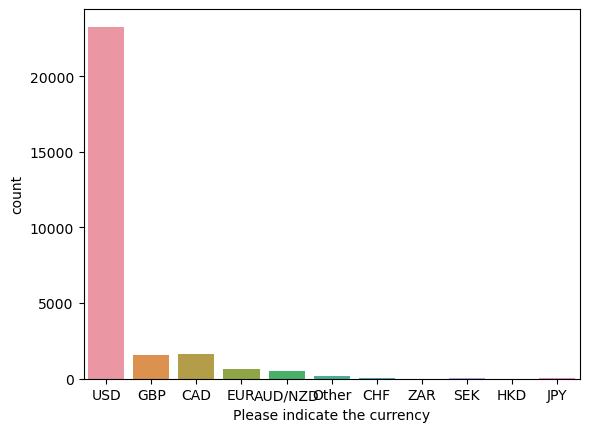

In [43]:
currency_plot = sns.countplot(data=salary_survey_data, x = categorical_variables[3])
currency_plot.get_xticklabels()